Data Preprocessing

In [1]:
from pathlib import Path
import pandas as pd
import os

import pf

raw_data_dir = Path("E:/Sri-Lanka-Cricket/data/raw")
processed_dir = Path("E:/Sri-Lanka-Cricket/data/processed")
extra_dir = Path("E:/Sri-Lanka-Cricket/data/extra")

df = pd.read_csv(raw_data_dir / "sl_match_results_odi.csv")
df.head()

print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  910
Number of columns:  9


In [2]:
#Extracting the abandoned and n/r(no result) matches
df = pd.read_csv(raw_data_dir / "sl_match_results_odi.csv")

matches = df[df["Result"].isin(["aban", "n/r"])]

os.makedirs(extra_dir, exist_ok = True)

matches.to_csv(extra_dir / "abandoned.csv", index = False)

print('Number of rows: ', matches.shape[0])
print('Number of columns: ', matches.shape[1])

Number of rows:  58
Number of columns:  9


In [3]:
from pathlib import Path
import pandas as pd

# --- Paths ---
raw_data_dir  = Path("E:/Sri-Lanka-Cricket/data/raw")
processed_dir = Path("E:/Sri-Lanka-Cricket/data/processed")
extra_dir     = Path("E:/Sri-Lanka-Cricket/data/extra")

# Create directories if they don't exist
processed_dir.mkdir(parents=True, exist_ok=True)
extra_dir.mkdir(parents=True, exist_ok=True)

# --- Load original dataset ---
df = pd.read_csv(raw_data_dir / "sl_match_results_odi.csv")

print(f"Original total matches (including aban/n-r): {len(df)}")

# --- Extract and save abandoned / no-result matches ---
abandoned_matches = df[df["Result"].isin(["aban", "n/r"])].copy()
abandoned_matches = abandoned_matches.reset_index(drop=True)
abandoned_matches.to_csv(extra_dir / "abandoned_matches.csv", index=False)

# --- Create cleaned dataset (only completed matches) ---
df_clean = df[~df["Result"].isin(["aban", "n/r"])].copy()
df_clean = df_clean.reset_index(drop=True)

# --- Save cleaned dataset ---
output_path = processed_dir / "preprocessed_1.csv"
df_clean.to_csv(output_path, index=False)

# --- Final summary ---
print(f"Total matches in raw file           : {len(df)}")
print(f"Abandoned / No-result matches       : {len(abandoned_matches)}")
print(f"Completed matches (wins/losses/ties): {len(df_clean)}")
print(f"→ Check: {len(abandoned_matches)} + {len(df_clean)} = {len(abandoned_matches) + len(df_clean)}")
print()
print(f"Cleaned dataset saved to:")
print(f"   → {output_path}")
print(f"Abandoned matches saved to:")
print(f"   → {extra_dir / 'abandoned_matches.csv'}")

Original total matches (including aban/n-r): 910
Total matches in raw file           : 910
Abandoned / No-result matches       : 58
Completed matches (wins/losses/ties): 852
→ Check: 58 + 852 = 910

Cleaned dataset saved to:
   → E:\Sri-Lanka-Cricket\data\processed\preprocessed_1.csv
Abandoned matches saved to:
   → E:\Sri-Lanka-Cricket\data\extra\abandoned_matches.csv


In [4]:
from pathlib import Path
import pandas as pd

# --- Paths ---
processed_dir = Path("E:/Sri-Lanka-Cricket/data/processed")

# --- Load the correct cleaned & split dataset ---
# This must be created from preprocessed_1.csv (completed matches only)
df = pd.read_csv(processed_dir / "before_Sanga_rtr.csv")

# --- Ensure we're working with completed matches only ---
total_matches = len(df)
wins  = len(df[df['Result'] == 'won'])
losses = len(df[df['Result'] == 'lost'])
ties   = len(df[df['Result'] == 'tied'])

# Optional: catch any unexpected Result values
others = total_matches - (wins + losses + ties)

# --- Save win/loss/tie datasets ---
df[df['Result'] == 'won'].to_csv(processed_dir / "before_sanga_win.csv", index=False)
df[df['Result'] == 'lost'].to_csv(processed_dir / "before_sanga_lose.csv", index=False)
df[df['Result'] == 'tied'].to_csv(processed_dir / "before_sanga_tied.csv", index=False)

# --- Beautiful Summary Output ---
print(f"Total Matches Played           : {total_matches}")
print(f"Matches Won                    : {wins}   →  {wins/total_matches*100:5.2f}%")
print(f"Matches Lost                   : {losses} →  {losses/total_matches*100:5.2f}%")
print(f"Matches Tied                   : {ties}    →  {ties/total_matches*100:5.2f}%")
if others > 0:
    print(f"Other / Error rows             : {others}  ← Check data!")
print(f"Win Percentage                 : {wins/total_matches*100:5.2f}%")
print(f"Loss Percentage                : {losses/total_matches*100:5.2f}%")

# --- Save locations ---
print(f"\nWin/Loss/Tie files saved to:")
print(f"   → {processed_dir}")

Total Matches Played           : 730
Matches Won                    : 358   →  49.04%
Matches Lost                   : 360 →  49.32%
Matches Tied                   : 4    →   0.55%
Other / Error rows             : 8  ← Check data!
Win Percentage                 : 49.04%
Loss Percentage                : 49.32%

Win/Loss/Tie files saved to:
   → E:\Sri-Lanka-Cricket\data\processed


Before Sanga

In [5]:
from pathlib import Path
import pandas as pd

# --- Paths ---
processed_dir = Path("E:/Sri-Lanka-Cricket/data/processed")

# --- Load the correct cleaned dataset ---
df = pd.read_csv(processed_dir / "before_Sanga_rtr.csv")

# --- Count results ---
total   = len(df)
wins    = len(df[df['Result'] == 'won'])
losses  = len(df[df['Result'] == 'lost'])
ties    = len(df[df['Result'] == 'tied'])
others  = total - (wins + losses + ties)  # Should be 0 if data is clean

# --- Save win/loss/tied datasets ---
df[df['Result'] == 'won'].to_csv(processed_dir / "before_sanga_win.csv", index=False)
df[df['Result'] == 'lost'].to_csv(processed_dir / "before_sanga_lose.csv", index=False)
if ties > 0:
    df[df['Result'] == 'tied'].to_csv(processed_dir / "before_sanga_tied.csv", index=False)

# --- Beautiful & Accurate Output ---
print(f"Total Matches Played           : {total}")
print(f"Matches Won                    : {wins}   →  {wins/total*100:5.2f}%")
print(f"Matches Lost                   : {losses} →  {losses/total*100:5.2f}%")
print(f"Matches Tied                   : {ties}    →  {ties/total*100:5.2f}%")
if others > 0:
    print(f"Warning: Other/Unknown Results       : {others}  ← Check data!")
print(f"Overall Win Percentage         : {wins/total*100:5.2f}%")

# --- File save confirmation ---
print(f"\nWin/Loss/Tied datasets saved to:")
print(f"   → {processed_dir}\\before_sanga_win.csv")
print(f"   → {processed_dir}\\before_sanga_lose.csv")
if ties > 0:
    print(f"   → {processed_dir}\\before_sanga_tied.csv")

Total Matches Played           : 730
Matches Won                    : 358   →  49.04%
Matches Lost                   : 360 →  49.32%
Matches Tied                   : 4    →   0.55%
Overall Win Percentage         : 49.04%

Win/Loss/Tied datasets saved to:
   → E:\Sri-Lanka-Cricket\data\processed\before_sanga_win.csv
   → E:\Sri-Lanka-Cricket\data\processed\before_sanga_lose.csv
   → E:\Sri-Lanka-Cricket\data\processed\before_sanga_tied.csv


In [6]:
from pathlib import Path
import pandas as pd

# --- Paths ---
processed_dir = Path("E:/Sri-Lanka-Cricket/data/processed")

# --- Load the dataset ---
df = pd.read_csv(processed_dir / "before_Sanga_rtr.csv")

print(f"Total matches in Sangakkara era: {len(df)}\n")

# --- Split by batting order ---
df_bat_first = df[df['Bat'] == '1st'].copy()
df_chase     = df[df['Bat'] == '2nd'].copy()

# Reset indexes
df_bat_first = df_bat_first.reset_index(drop=True)
df_chase     = df_chase.reset_index(drop=True)

# --- Save the split datasets ---
df_bat_first.to_csv(processed_dir / "before_sanga_bat_first.csv", index=False)
df_chase.to_csv(processed_dir / "before_sanga_chase.csv", index=False)

# --- Performance Summary ---
def print_performance(title, data):
    total = len(data)
    won   = len(data[data['Result'] == 'won'])
    lost  = len(data[data['Result'] == 'lost'])
    tied  = len(data[data['Result'] == 'tied'])
    win_pct = won / total * 100 if total > 0 else 0

    print(f"{title}")
    print(f"   Matches          : {total}")
    print(f"   Won              : {won}  →  {win_pct:5.2f}%")
    print(f"   Lost             : {lost}")
    print(f"   Tied             : {tied}")
    print(f"   Win Rate         : {win_pct:5.2f}%\n")

# --- Final Report ---
print_performance("BATTING FIRST", df_bat_first)
print_performance("CHASING (Bowling First)", df_chase)

print("OVERALL SUMMARY")
print(f"Total Matches Played           : {len(df)}")
print(f"Batting First Matches          : {len(df_bat_first)}  →  {len(df_bat_first)/len(df)*100:5.2f}%")
print(f"Chasing Matches                : {len(df_chase)}      →  {len(df_chase)/len(df)*100:5.2f}%")
print(f"Overall Win Rate               : {len(df[df['Result']=='won'])/len(df)*100:5.2f}%")

# --- Save confirmation ---
print(f"\nSplit files saved successfully:")
print(f"   → {processed_dir / 'before_sanga_bat_first.csv'}")
print(f"   → {processed_dir / 'before_sanga_chase.csv'}")

Total matches in Sangakkara era: 730

BATTING FIRST
   Matches          : 361
   Won              : 181  →  50.14%
   Lost             : 178
   Tied             : 2
   Win Rate         : 50.14%

CHASING (Bowling First)
   Matches          : 359
   Won              : 175  →  48.75%
   Lost             : 182
   Tied             : 2
   Win Rate         : 48.75%

OVERALL SUMMARY
Total Matches Played           : 730
Batting First Matches          : 361  →  49.45%
Chasing Matches                : 359      →  49.18%
Overall Win Rate               : 49.04%

Split files saved successfully:
   → E:\Sri-Lanka-Cricket\data\processed\before_sanga_bat_first.csv
   → E:\Sri-Lanka-Cricket\data\processed\before_sanga_chase.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

# --- Paths ---
processed_dir = Path("E:/Sri-Lanka-Cricket/data/processed")
output_dir    = Path("E:/Sri-Lanka-Cricket/eda_visualization")

# Create output folder
output_dir.mkdir(parents=True, exist_ok=True)

# --- Styling ---
# use seaborn style; fall back to 'seaborn' if specific style not available
try:
    plt.style.use('seaborn-v0_8')
except Exception:
    plt.style.use('seaborn')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 13
plt.rcParams['axes.titleweight'] = 'bold'

# --- Load data ---
df = pd.read_csv(processed_dir / "before_Sanga_rtr.csv")

# Normalize important text columns to avoid casing/whitespace bugs
for col in ['Result', 'Bat', 'Toss', 'Opposition']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

# FIXED DATE PARSING – works whether date is "18-Mar-15" or "2015-03-18"
# Try several common formats if dayfirst=True fails for some rows
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce', dayfirst=True)
if df['Start Date'].isna().any():
    # attempt ISO format fallback for rows that failed
    mask = df['Start Date'].isna()
    df.loc[mask, 'Start Date'] = pd.to_datetime(df.loc[mask, 'Start Date'].astype(str), errors='coerce', infer_datetime_format=True)

# Safety check: any date failed to parse?
if df['Start Date'].isna().any():
    print("Warning: Some dates couldn't be parsed. Showing up to 10 problematic rows:")
    print(df[df['Start Date'].isna()].head(10))
else:
    print(f"Successfully parsed all {len(df)} dates!")

# Drop rows missing a Result or Start Date as they are unusable for these plots
df = df[~df['Result'].isna() & ~df['Start Date'].isna()].copy()

# Sort by date and reset index
df = df.sort_values('Start Date').reset_index(drop=True)

# Helper columns
df['Won'] = (df['Result'] == 'won').astype(int)
df['Match_Number'] = range(1, len(df) + 1)

# 1. Overall Result Pie Chart
plt.figure()
result_counts = df['Result'].value_counts()
# create a color palette matching number of categories
colors = sns.color_palette("husl", n_colors=len(result_counts))
plt.pie(result_counts.values,
        labels=[r.capitalize() for r in result_counts.index],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 12})
plt.title('Sri Lanka ODI Results\n(Sangakkara & Mahela Era – up to dataset end date)',
          fontsize=18, pad=20)
plt.tight_layout()
plt.savefig(output_dir / "1_overall_results_pie.png", dpi=300, bbox_inches='tight')
plt.close()

# 2. Batting First vs Chasing Win Rate
plt.figure()
# Ensure Bat column uses consistent tokens ('1st' and '2nd') — allow '1'/'2' or '1st'/'2nd'
bat_vals = df['Bat'].replace({'1': '1st', '2': '2nd', 'first': '1st', 'second': '2nd'})
bat_first_win = bat_vals.eq('1st') & df['Result'].eq('won')
chase_win = bat_vals.eq('2nd') & df['Result'].eq('won')

# compute means safely (handle case where there are 0 matches for a category)
def percent(series_mask, total_mask):
    total = total_mask.sum()
    if total == 0:
        return 0.0
    return series_mask.sum() / total * 100

bat_first_rate = percent(bat_first_win, bat_vals.eq('1st'))
chase_rate = percent(chase_win, bat_vals.eq('2nd'))

bars = plt.bar(['Batting First', 'Chasing'],
               [bat_first_rate, chase_rate],
               color=['#FF9800', '#2196F3'],
               edgecolor='black', linewidth=1.2)

for bar, rate in zip(bars, [bat_first_rate, chase_rate]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1.5,
             f'{rate:.2f}%', ha='center', fontweight='bold', fontsize=14)

plt.ylim(0, 100)
plt.ylabel('Win Percentage (%)')
plt.title('Win Rate: Batting First vs Chasing', fontsize=18)
plt.tight_layout()
plt.savefig(output_dir / "2_bat_first_vs_chase.png", dpi=300, bbox_inches='tight')
plt.close()

# 3. Rolling Win Rate Over Time
plt.figure()
df['Rolling_Win_Rate'] = df['Won'].rolling(window=20, min_periods=1).mean() * 100

plt.plot(df['Match_Number'], df['Rolling_Win_Rate'], color='#9C27B0', linewidth=3.0)
plt.fill_between(df['Match_Number'], df['Rolling_Win_Rate'], alpha=0.2, color='#9C27B0')
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.7, label='50% Breakeven')
plt.xlabel('Match Number')
plt.ylabel('20-Match Rolling Win Rate (%)')
plt.title('Sri Lanka ODI Form Over Time\n(20-Match Rolling Average)', fontsize=18)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(output_dir / "3_rolling_win_rate.png", dpi=300, bbox_inches='tight')
plt.close()

# 4. Toss Impact
plt.figure()
# normalize toss values to 'won'/'lost'
toss_vals = df['Toss'].replace({'win': 'won', 'won': 'won', 'lose': 'lost', 'lost': 'lost'})
toss_win_rate = df[toss_vals == 'won']['Result'].eq('won').mean() * 100 if (toss_vals == 'won').any() else 0.0
toss_lose_rate = df[toss_vals == 'lost']['Result'].eq('won').mean() * 100 if (toss_vals == 'lost').any() else 0.0

bars = plt.bar(['Won Toss', 'Lost Toss'], [toss_win_rate, toss_lose_rate],
               color=['#4CAF50', '#F44336'], edgecolor='black')
for bar, rate in zip(bars, [toss_win_rate, toss_lose_rate]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{rate:.1f}%', ha='center', fontweight='bold', fontsize=14)

plt.ylim(0, 100)
plt.ylabel('Win Percentage (%)')
plt.title('Impact of Winning the Toss', fontsize=18)
plt.tight_layout()
plt.savefig(output_dir / "4_toss_impact.png", dpi=300, bbox_inches='tight')
plt.close()

# 5. Win % vs Major Opponents
plt.figure()
opp_stats = df.groupby('Opposition', dropna=False).agg(
    Played=('Result', 'count'),
    Won=('Result', lambda x: (x == 'won').sum())
).reset_index()
opp_stats['Win_pct'] = opp_stats['Won'] / opp_stats['Played'] * 100

# filter minimum matches
opp_stats = opp_stats[opp_stats['Played'] >= 20].sort_values('Win_pct', ascending=True)  # ascending for horizontal bar

# Clean opposition labels for display (remove leading 'v ' or similar)
opp_stats['Opp_display'] = opp_stats['Opposition'].str.replace(r'^\s*v\s+', '', regex=True, case=False)

plt.barh(opp_stats['Opp_display'], opp_stats['Win_pct'], color='skyblue', edgecolor='navy')
plt.xlabel('Win Percentage (%)')
plt.title('Sri Lanka Win % vs Major Opponents\n(Min. 20 Matches)', fontsize=18)

# annotate bars
for i, (opp, winp) in enumerate(zip(opp_stats['Opp_display'], opp_stats['Win_pct'])):
    plt.text(winp + 1, i, f'{winp:.1f}%', va='center', fontsize=11)

plt.tight_layout()
plt.savefig(output_dir / "5_vs_opposition.png", dpi=300, bbox_inches='tight')
plt.close()

print("\nAll visualizations created and saved (if data present).")
print(f"Location: {output_dir}")
print("\nGenerated files:")
for f in sorted(output_dir.glob("*.png")):
    print(f"   → {f.name}")


C:\Users\Nandun Samarasekara\AppData\Local\Temp\ipykernel_15272\2305682089.py:39: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.loc[mask, 'Start Date'] = pd.to_datetime(df.loc[mask, 'Start Date'].astype(str), errors='coerce', infer_datetime_format=True)


         Team Result     Margin  BR  Toss  Bat     Opposition         Ground  \
2   Sri Lanka   lost   192 runs   0   won  2nd     v pakistan     Nottingham   
4   Sri Lanka    won    47 runs   0  lost  1st        v india     Manchester   
5   Sri Lanka   lost     5 runs   0   won  2nd      v england  Colombo (SSC)   
6   Sri Lanka    won     3 runs   0  lost  1st      v england  Colombo (SSC)   
8   Sri Lanka    won    30 runs   0   won  2nd     v pakistan         Lahore   
9   Sri Lanka   lost  5 wickets  11  lost  1st     v pakistan        Karachi   
11  Sri Lanka   lost  6 wickets  55   won  1st        v india          Delhi   
12  Sri Lanka   lost  6 wickets  64   won  1st        v india      Bengaluru   
14  Sri Lanka   lost  7 wickets  80  lost  1st  v new zealand         Napier   
15  Sri Lanka   lost   116 runs   0  lost  2nd  v new zealand       Auckland   

   Start Date  
2         NaT  
4         NaT  
5         NaT  
6         NaT  
8         NaT  
9         NaT  
11     

After Sanga's retirement

In [8]:
from pathlib import Path
import pandas as pd

# --- Paths ---
processed_dir = Path("E:/Sri-Lanka-Cricket/data/processed")

# --- Load the correct cleaned dataset ---
df = pd.read_csv(processed_dir / "after_Sanga_rtr.csv")

# --- Count results ---
total   = len(df)
wins    = len(df[df['Result'] == 'won'])
losses  = len(df[df['Result'] == 'lost'])
ties    = len(df[df['Result'] == 'tied'])
others  = total - (wins + losses + ties)  # Should be 0 if data is clean

# --- Save win/loss/tied datasets ---
df[df['Result'] == 'won'].to_csv(processed_dir / "before_sanga_win.csv", index=False)
df[df['Result'] == 'lost'].to_csv(processed_dir / "before_sanga_lose.csv", index=False)
if ties > 0:
    df[df['Result'] == 'tied'].to_csv(processed_dir / "before_sanga_tied.csv", index=False)

# --- Beautiful & Accurate Output ---
print(f"Total Matches Played           : {total}")
print(f"Matches Won                    : {wins}   →  {wins/total*100:5.2f}%")
print(f"Matches Lost                   : {losses} →  {losses/total*100:5.2f}%")
print(f"Matches Tied                   : {ties}    →  {ties/total*100:5.2f}%")
if others > 0:
    print(f"Warning: Other/Unknown Results       : {others}  ← Check data!")
print(f"Overall Win Percentage         : {wins/total*100:5.2f}%")

# --- File save confirmation ---
print(f"\nWin/Loss/Tied datasets saved to:")
print(f"   → {processed_dir}\\before_sanga_win.csv")
print(f"   → {processed_dir}\\before_sanga_lose.csv")
if ties > 0:
    print(f"   → {processed_dir}\\before_sanga_tied.csv")

Total Matches Played           : 133
Matches Won                    : 43   →  32.33%
Matches Lost                   : 78 →  58.65%
Matches Tied                   : 1    →   0.75%
Overall Win Percentage         : 32.33%

Win/Loss/Tied datasets saved to:
   → E:\Sri-Lanka-Cricket\data\processed\before_sanga_win.csv
   → E:\Sri-Lanka-Cricket\data\processed\before_sanga_lose.csv
   → E:\Sri-Lanka-Cricket\data\processed\before_sanga_tied.csv


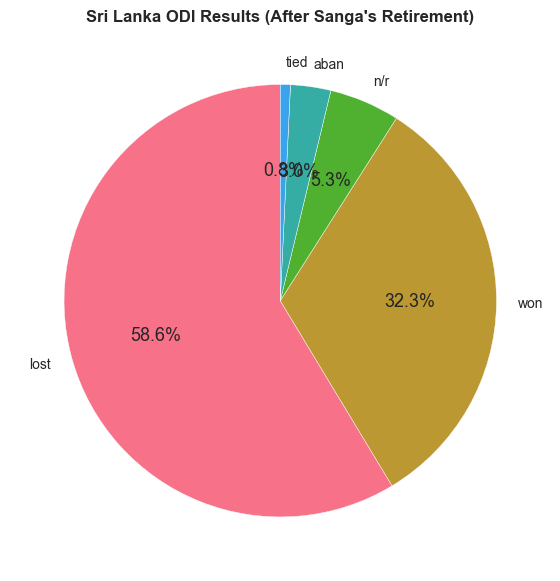

In [9]:
import matplotlib.pyplot as plt

# --- Prepare data ---
counts = df['Result'].value_counts()

# --- Pie Chart ---
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Sri Lanka ODI Results (After Sanga's Retirement)")
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- Paths ---
processed_dir = Path("E:/Sri-Lanka-Cricket/data/processed")
viz_dir = Path("E:/Sri-Lanka-Cricket/eda_visualization")
viz_dir.mkdir(exist_ok=True)

# --- Load after-Sanga dataset ---
df = pd.read_csv(processed_dir / "after_Sanga_rtr.csv")

# Convert results to 1/0 for rolling win rate
df['WinFlag'] = df['Result'].apply(lambda x: 1 if x == 'won' else 0)

# Rolling 20-match win percentage
df['RollingWinRate'] = df['WinFlag'].rolling(window=20).mean() * 100

# --- Plot ---
plt.figure(figsize=(16, 8))

plt.plot(df['RollingWinRate'], color='purple', linewidth=3)
plt.fill_between(df.index, df['RollingWinRate'], color='purple', alpha=0.15)

# 50% reference line
plt.axhline(50, color='gray', linestyle='--', linewidth=1.5)
plt.text(5, 51.5, "50% Breakeven", color='gray')

plt.title("Sri Lanka ODI Form Over Time (After Sanga’s Retirement)\n20-Match Rolling Average",
          fontsize=18, weight='bold')
plt.xlabel("Match Number", fontsize=14)
plt.ylabel("20-Match Rolling Win Rate (%)", fontsize=14)

plt.tight_layout()

# Save plot
save_path = viz_dir / "after_sanga_rolling_winrate.png"
plt.savefig(save_path, dpi=300)
plt.close()

print(f"Saved: {save_path}")


Saved: E:\Sri-Lanka-Cricket\eda_visualization\after_sanga_rolling_winrate.png


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- Paths ---
processed_dir = Path("E:/Sri-Lanka-Cricket/data/processed")
viz_dir = Path("E:/Sri-Lanka-Cricket/eda_visualization")
viz_dir.mkdir(exist_ok=True)

# --- Load dataset ---
df = pd.read_csv(processed_dir / "after_Sanga_rtr.csv")

# --- Compute win rates ---
toss_win_rate  = df[df['Toss'] == 'won']['Result'].eq('won').mean() * 100
toss_lose_rate = df[df['Toss'] == 'lost']['Result'].eq('won').mean() * 100

labels = ['Won Toss', 'Lost Toss']
values = [toss_win_rate, toss_lose_rate]

# --- Plot ---
plt.figure(figsize=(10, 6))

bars = plt.bar(labels, values,
               color=["seagreen", "crimson"],
               edgecolor='black',
               linewidth=1.4)

# Add value labels
for bar, rate in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 1.2,
             f"{rate:.1f}%",
             ha='center', va='bottom',
             fontsize=13, fontweight='bold')

plt.ylim(0, 100)
plt.ylabel("Win Percentage (%)", fontsize=14)
plt.title("Impact of Winning the Toss\n(After Kumar Sangakkara's Retirement)",
          fontsize=18, weight='bold')

plt.tight_layout()

# Save the figure
save_path = viz_dir / "after_sanga_toss_impact.png"
plt.savefig(save_path, dpi=300)
plt.close()

print(f"Saved: {save_path}")


Saved: E:\Sri-Lanka-Cricket\eda_visualization\after_sanga_toss_impact.png


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- Paths ---
processed_dir = Path("E:/Sri-Lanka-Cricket/data/processed")
viz_dir = Path("E:/Sri-Lanka-Cricket/eda_visualization")
viz_dir.mkdir(exist_ok=True)

# --- Load dataset ---
df = pd.read_csv(processed_dir / "after_Sanga_rtr.csv")

# --- Compute win rates ---
bat_first_win = df[df['Bat'] == '1st']['Result'].eq('won').mean() * 100
chase_win     = df[df['Bat'] == '2nd']['Result'].eq('won').mean() * 100

labels = ["Batting First", "Chasing"]
values = [bat_first_win, chase_win]

# --- Plot ---
plt.figure(figsize=(10, 6))

bars = plt.bar(labels, values,
               color=["darkorange", "royalblue"],
               edgecolor="black",
               linewidth=1.4)

# Add data labels above bars
for bar, rate in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 1.5,
             f"{rate:.2f}%",
             ha='center', fontsize=13, fontweight='bold')

plt.ylim(0, 100)
plt.ylabel("Win Percentage (%)", fontsize=14)
plt.title("Win Rate: Batting First vs Chasing\n(After Kumar Sangakkara's Retirement)",
          fontsize=18, weight="bold")

plt.tight_layout()

# Save figure
save_path = viz_dir / "after_sanga_batting_vs_chasing.png"
plt.savefig(save_path, dpi=300)
plt.close()

print(f"Saved: {save_path}")


Saved: E:\Sri-Lanka-Cricket\eda_visualization\after_sanga_batting_vs_chasing.png
